# Lab 3: Clustering and Manifold Learning

This notebook demonstrates:
- the k-Means clustering algorithm
- the use of manifold-learning techniques to project a clustered dataset into a 2D space and visualise it as a scatterplot

It is assumed that the input dataset contains ___only numerical___ attributes. To use this code with a dataset that contains categorical attributes, they first need to be _somehow_ transformed to numerical. How categorical attributes can be represented as numerical may depend on the nature of the dataset.

When you go through this notebook for the first time you may __skip section C__ and go back to it at the end.

### A. Import Python Modules and Dataset

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from numpy.random import seed


from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#### Load the dataset

In [204]:
lab3_df = pd.read_csv("./loans_dataset_et3.csv")
lab3_data = np.array(lab3_df.values, dtype=float)
print('(number of examples, number of attributes): ', lab3_data.shape)

(number of examples, number of attributes):  (332, 5)


In [205]:
lab3_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


In [206]:
lab3_df.mean()

ApplicantIncome      5201.093373
CoapplicantIncome    1495.508795
LoanAmount            140.882530
Loan_Amount_Term      341.710843
Credit_History          0.978916
dtype: float64

In [207]:
seed(1)

### B. Scale the Data
Here we scale the values in each column to the interval [0,1]. See https://scikit-learn.org/stable/modules/preprocessing.html for alternative scaling methods. In yout work on this excersise experiment with other scaling techniques to see if they lead to a more insightful clustering.

In [208]:
min_max_scaler = preprocessing.MinMaxScaler()
lab3_data = min_max_scaler.fit_transform(lab3_data)

#Scaled data has zero mean and unit variance
#lab3_data = preprocessing.scale(lab3_data)

#MaxAbsScaler will not be used because this method is meant for data that is already centered at zero or sparse data, which is not our case here
#max_abs_scaler = preprocessing.MaxAbsScaler()
#lab3_data = max_abs_scaler.fit_transform(lab3_data)


In [209]:
print(pd.DataFrame(lab3_data).min())
print(pd.DataFrame(lab3_data).max())
print(pd.DataFrame(lab3_data).mean())
print(pd.DataFrame(lab3_data).std())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64
0    0.115772
1    0.074775
2    0.212491
3    0.670740
4    0.978916
dtype: float64
0    0.116502
1    0.099137
2    0.129578
3    0.146789
4    0.143882
dtype: float64


### C. Scatterplot Function (to be used below for visualising a clustering)

Skip this section when you read the notebook for the first time.

In [210]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=cm.nipy_spectral(float(i) / n_clusters),
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

Number of clusters $k$.

In [211]:
k = 3

#### Run k-Means

See https://scikit-learn.org/stable/modules/clustering.html for alternative clustering methods.

In [212]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(lab3_data)

### E. Apply a manifold-learning technique to project the data set to a 2D space

https://scikit-learn.org/stable/modules/manifold.html

In [213]:
# append the cluster centers to the dataset
lab3_data_and_centers = np.r_[lab3_data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

In [214]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(lab3_data_and_centers)
print("transformation complete")

transformation complete


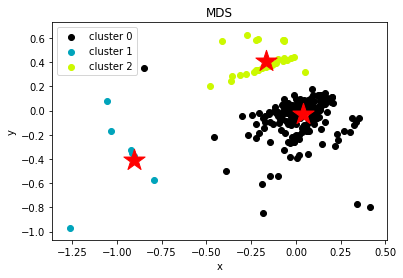

In [215]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [216]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(lab3_data_and_centers)
print("transformation complete")

transformation complete


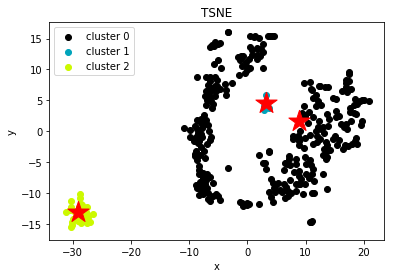

In [217]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### F. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [218]:
lab3_df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=lab3_df.index)

In [219]:
lab3_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
0,2483,2466.0,90,180,0,1
1,4917,0.0,130,360,0,1
2,4106,0.0,40,180,1,2
3,3859,3300.0,142,180,1,2
4,6417,0.0,157,180,1,2


In [220]:
lab3_df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
327,5417,4196.0,267,360,1,0
328,16666,0.0,275,360,1,0
329,10750,0.0,312,360,1,0
330,5955,5625.0,315,360,1,0
331,6133,3906.0,324,360,1,0


#### Compute the mean value of each attribute for each cluster

In [221]:
lab3_df.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,5112.803390,1501.383458,141.827119,360.813559,1.0
1,9153.857143,2098.142857,206.285714,308.571429,0.0
2,5146.966667,1297.126666,116.333333,161.600000,1.0


#### Conclusion

By looking at the table above we can argue that:
* Credit history splits perfectly cluster 1 against clusters 0 and 2, with a credit history =1 for cluster 0 & 2, and 0 for cluster 1
* Cluster 1 contains people with higher income for themselves and for Coapplicants, and also with higher LoanAmount
* Cluster 0 is having greater Loan_Amount_Term
* Cluster 2 seems to be the one containing people with very low Loan_Amount_Term



## TASK 2

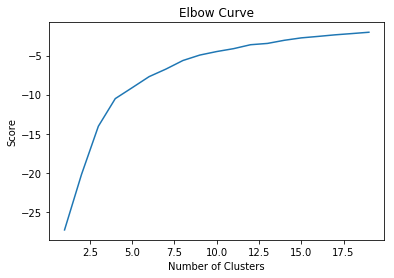

In [222]:
Nc = range(1, 20)

kmeans = [cluster.KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(lab3_data).score(lab3_data) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

we see that the graph levels off rapidly after 3 clusters, implying that addition of more clusters do not explain much more of the variance

For n_clusters = 2 The average silhouette_score is : 0.7596807546208396
For n_clusters = 3 The average silhouette_score is : 0.5993683877939564
For n_clusters = 4 The average silhouette_score is : 0.49382717460168524
For n_clusters = 5 The average silhouette_score is : 0.32027717634881653
For n_clusters = 6 The average silhouette_score is : 0.32784578244617285
For n_clusters = 7 The average silhouette_score is : 0.36099990303045243
For n_clusters = 8 The average silhouette_score is : 0.4125967686749802


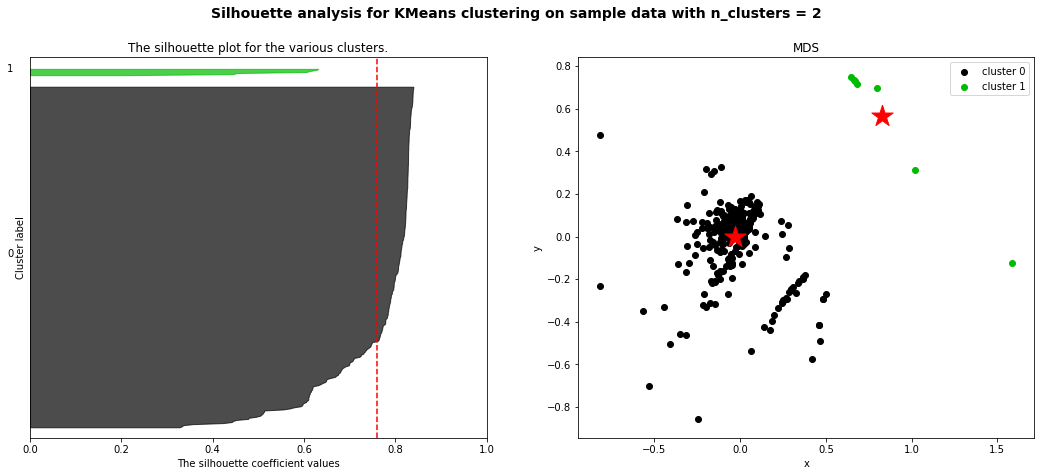

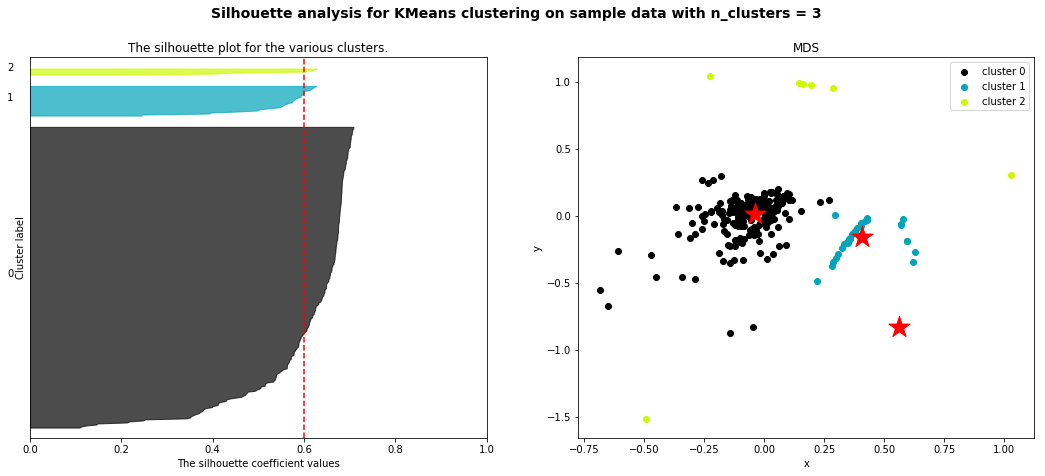

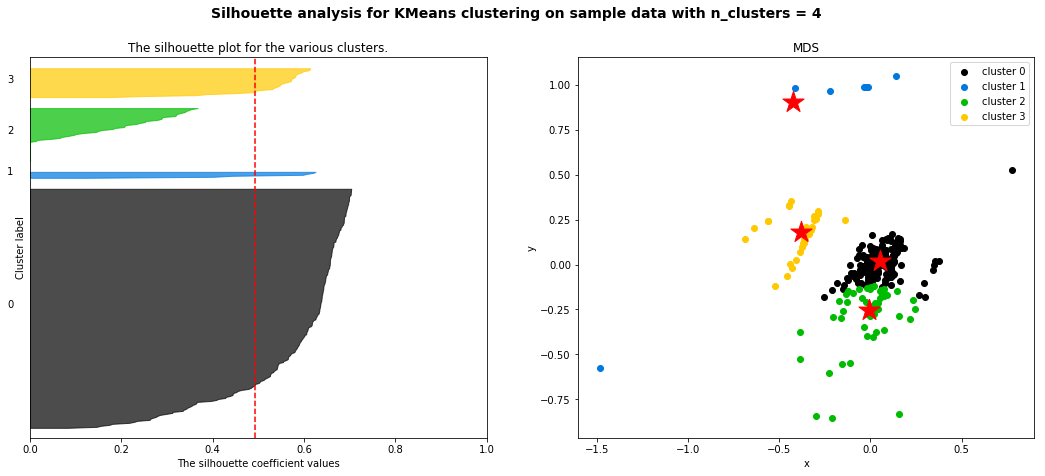

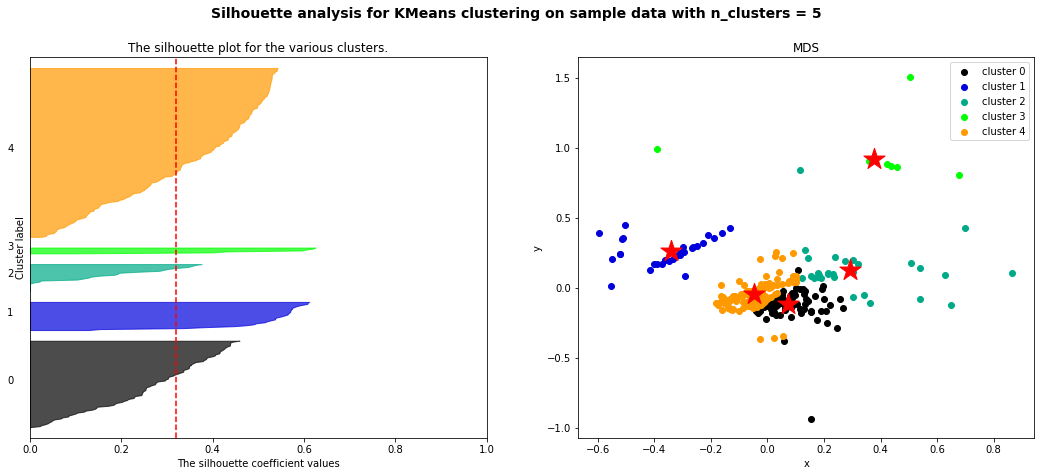

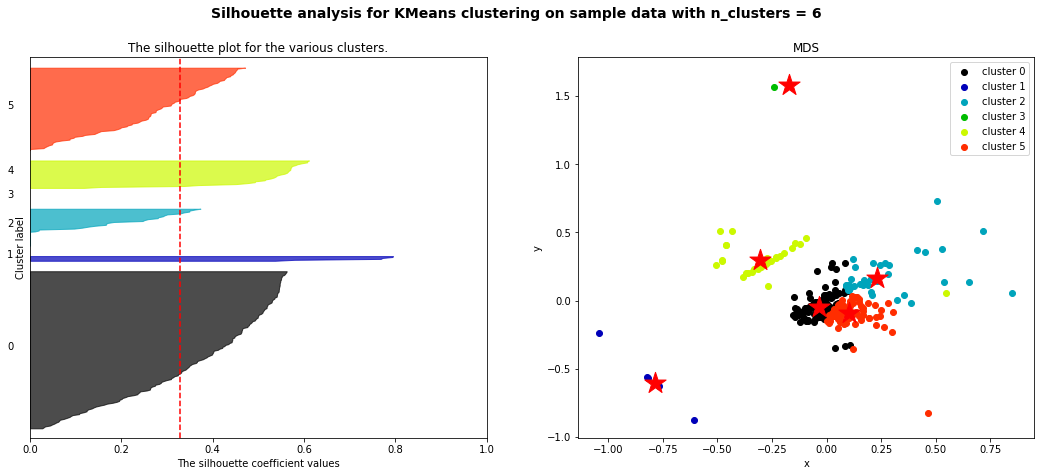

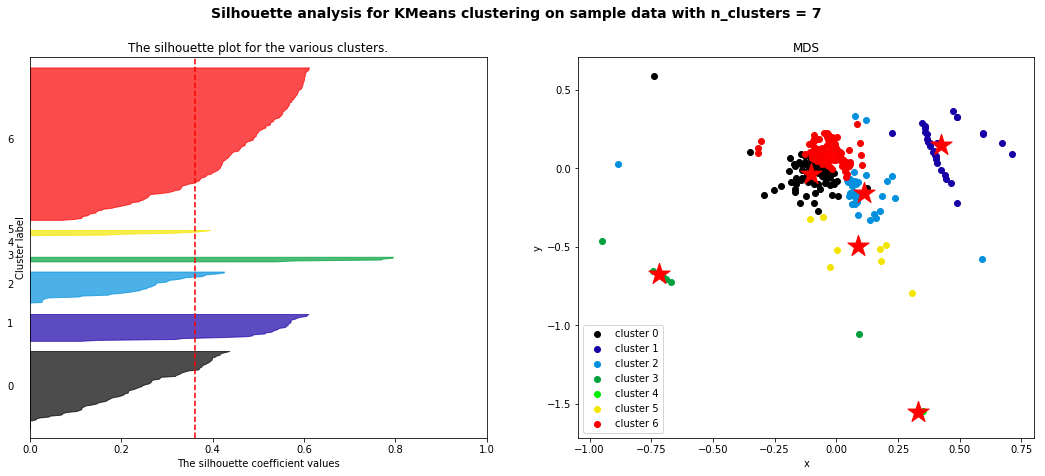

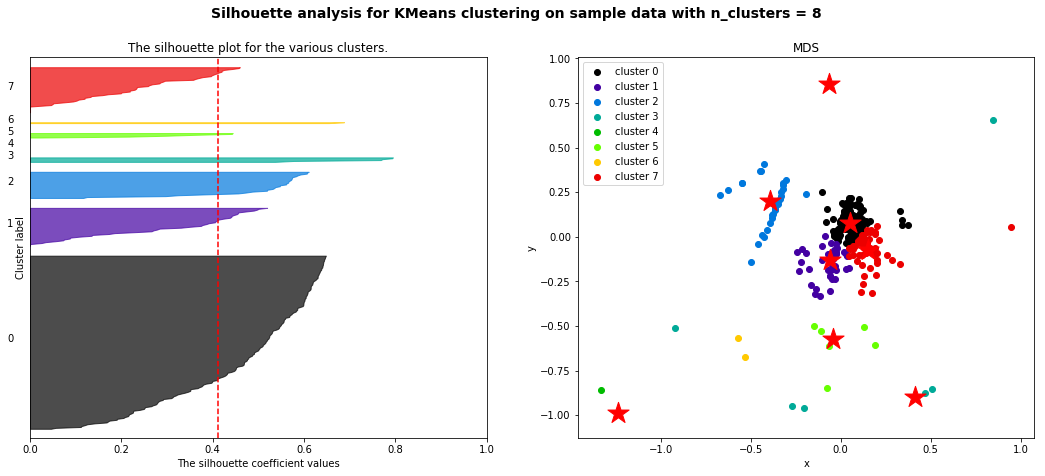

In [223]:
X=lab3_data
range_n_clusters = [2, 3, 4, 5, 6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([0, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    # append the cluster centers to the dataset
    lab3_data_and_centers = np.r_[lab3_data,clusterer.cluster_centers_]
    # project both th data and the k-Means cluster centers to a 2D space
    XYcoordinates = manifold.MDS(n_components=2).fit_transform(lab3_data_and_centers)
    # plot the transformed examples and the centers
    # use the cluster assignment to colour the examples
    # plot the transformed examples and the centers
    # use the cluster assignment to colour the examples
    
    clustering_scatterplot(points=XYcoordinates[:-n_clusters,:], 
                           labels=cluster_labels,
                           centers=XYcoordinates[-n_clusters:,:], 
                           title='MDS')

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette plots confirms the elbow method result, k=3 seems to be the optimal choice number of clusters.

In [224]:
X=lab3_data

Computing embedding
Done.
ward :	0.01s
average :	0.02s
complete :	0.00s
single :	0.00s


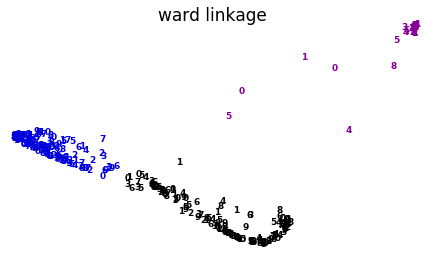

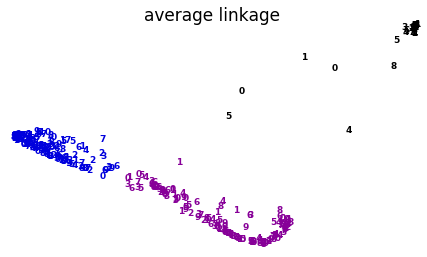

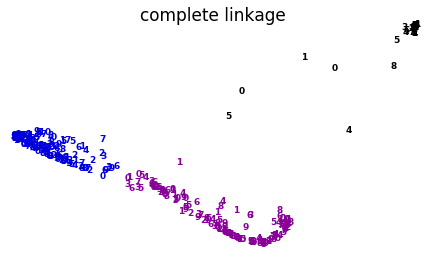

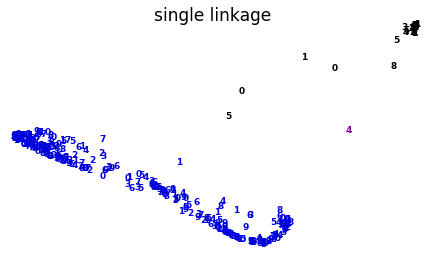

In [225]:
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

In [226]:
lab3_df['Cluster'] = pd.Series(clustering.labels_, index=lab3_df.index)
lab3_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster,Cluster
0,2483,2466.0,90,180,0,1,0
1,4917,0.0,130,360,0,1,2
2,4106,0.0,40,180,1,2,0
3,3859,3300.0,142,180,1,2,0
4,6417,0.0,157,180,1,2,0


In [227]:
lab3_df.groupby('Cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
Cluster,,,,,,
0,5072.909091,1351.903030,119.212121,170.545455,0.969697,1.848485
1,3500.000000,0.000000,81.000000,300.000000,1.000000,0.000000
2,5220.996644,1516.429933,143.483221,360.805369,0.979866,0.020134


Agglomerative Clustering has a better performed a better clustering for the 3 clusters, we clearly see a pure separation between the clusters which wasn't the case for K means.
Also the caracteristics of clusters are different :
* There is no more difference based on Credit_History,in the sense that all of the clusters have almost the same value for this variable.
* Cluster 1 is now dedicated for low Incomes and low LoanAMount
* Cluster 2 has the greater Loan_AMount_Term

